# Imports

In [1]:
# ============================================================================
# 04_results.py
# Loads and visualizes results from 03_modeling.py
# Includes model comparison, ROC/PR curves, confusion matrices, feature importance, and DCA
# ============================================================================

import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, precision_recall_curve, auc
from pathlib import Path

# Load Models and Results

In [3]:
# ============================================================================
# 1. LOAD MODELS AND RESULTS
# ============================================================================
print("="*80)
print("LOAD MODELS AND RESULTS")
print("="*80)

# Festgelegter Pfad zu deinem models-Ordner
models_dir = Path(r"C:\Users\Eyyub\Desktop\StackFuel\PortfolioProjekt\DPP-Stackfuel-Data-Science-Projekt\models")

# Lade die gespeicherten Modell-Ergebnisse
model_results = joblib.load(models_dir / "model_results.pkl")

# Lade die einzelnen Modelle (nach Name)
models = {}
for model_name in model_results.keys():
    model_path = models_dir / f"{model_name.replace(' ', '_')}_model.pkl"
    models[model_name] = joblib.load(model_path)

# Lade die Test-Labels
target_test = joblib.load(models_dir / "target_test.pkl")

print(f"Loaded models: {list(models.keys())}")
print(f"Test labels shape: {target_test.shape}")


LOAD MODELS AND RESULTS
Loaded models: ['Random Forest', 'XGBoost', 'Logistic Regression', 'Neural Network', 'SVM', 'K-Nearest Neighbors', 'Decision Tree', 'Naive Bayes']
Test labels shape: (45895,)


# Model Comparison Table

In [4]:
# ============================================================================
# 2. MODEL COMPARISON TABLE
# ============================================================================
print("\n" + "="*80)
print("MODEL COMPARISON TABLE")
print("="*80)

comparison_data = []
for name, res in model_results.items():
    comparison_data.append({
        "Model": name,
        "AUC": res['auc'],
        "Precision": res['precision'],
        "Recall": res['recall'],
        "F1": res['f1'],
        "Accuracy": res['accuracy'],
        "Best Threshold": res.get('best_threshold', 0.5)
    })

df_comparison = pd.DataFrame(comparison_data).sort_values("F1", ascending=False)
print(df_comparison.to_string(index=False))



MODEL COMPARISON TABLE
              Model      AUC  Precision   Recall       F1  Accuracy  Best Threshold
            XGBoost 0.815416   0.370106 0.642399 0.469639  0.778102        0.260960
Logistic Regression 0.808352   0.378504 0.602080 0.464804  0.787951        0.634490
                SVM 0.808368   0.369580 0.624163 0.464261  0.779693        0.618986
        Naive Bayes 0.762289   0.311205 0.684570 0.427891  0.720035        0.950891
     Neural Network 0.769980   0.324482 0.609346 0.423465  0.746247        0.422415
      Random Forest 0.763384   0.323888 0.597663 0.420109  0.747663        0.270000
K-Nearest Neighbors 0.715296   0.278787 0.629862 0.386502  0.694193        0.600000
      Decision Tree 0.592259   0.287119 0.336943 0.310042  0.770650        1.000000


# ROC and PR Curves


ROC AND PR CURVES


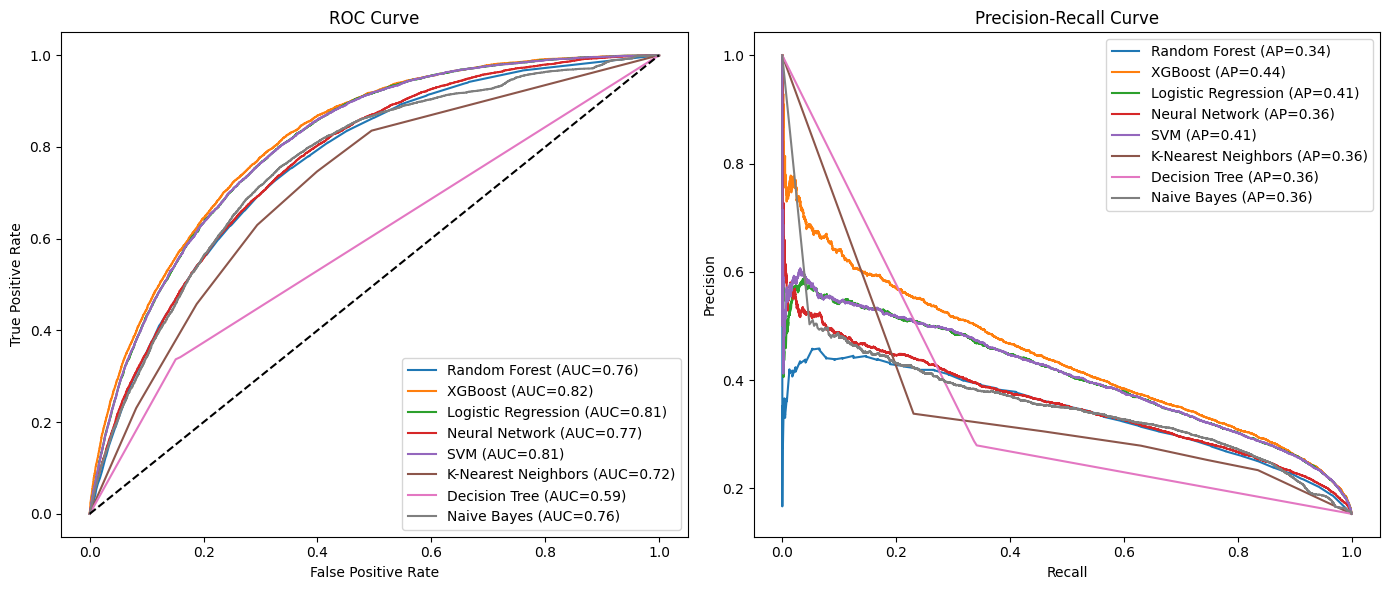

ROC and PR curves saved as '04_model_curves.png'


In [5]:
# ============================================================================
# 3. ROC AND PR CURVES
# ============================================================================
print("\n" + "="*80)
print("ROC AND PR CURVES")
print("="*80)

plt.figure(figsize=(14,6))

for name, res in model_results.items():
    y_proba = res['y_proba']
    fpr, tpr, _ = roc_curve(target_test, y_proba)
    precision, recall, _ = precision_recall_curve(target_test, y_proba)
    roc_auc = auc(fpr, tpr)
    pr_auc = auc(recall, precision)

    plt.subplot(1,2,1)
    plt.plot(fpr, tpr, label=f"{name} (AUC={roc_auc:.2f})")
    plt.subplot(1,2,2)
    plt.plot(recall, precision, label=f"{name} (AP={pr_auc:.2f})")

plt.subplot(1,2,1)
plt.plot([0,1],[0,1],'k--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()

plt.subplot(1,2,2)
plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()

plt.tight_layout()
plt.savefig("04_model_curves.png", dpi=300, bbox_inches='tight')
plt.show()
print("ROC and PR curves saved as '04_model_curves.png'")

# Confusion Matrix and Classification Report (Best Model)


CONFUSION MATRIX AND CLASSIFICATION REPORT (BEST MODEL)
Best model: XGBoost (Threshold=0.261)
              precision    recall  f1-score   support

         0.0       0.93      0.80      0.86     38876
         1.0       0.37      0.64      0.47      7019

    accuracy                           0.78     45895
   macro avg       0.65      0.72      0.66     45895
weighted avg       0.84      0.78      0.80     45895



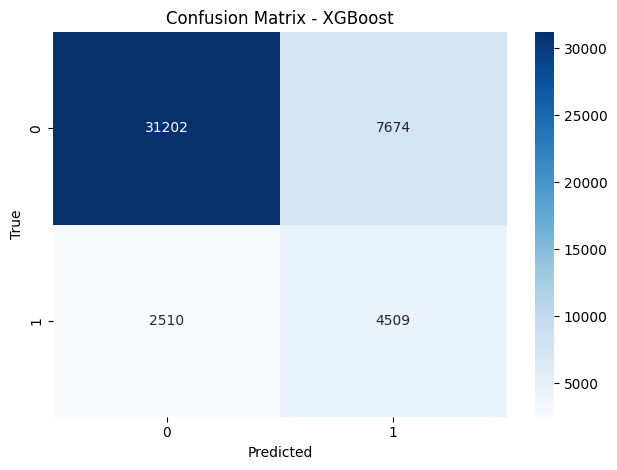

Confusion matrix saved as '04_confusion_matrix.png'


In [6]:
# ============================================================================
# 4. CONFUSION MATRIX AND CLASSIFICATION REPORT (BEST MODEL)
# ============================================================================
print("\n" + "="*80)
print("CONFUSION MATRIX AND CLASSIFICATION REPORT (BEST MODEL)")
print("="*80)

best_model_name = df_comparison.iloc[0]['Model']
best_res = model_results[best_model_name]
best_threshold = best_res.get('best_threshold', 0.5)
y_pred = (best_res['y_proba'] >= best_threshold).astype(int)

print(f"Best model: {best_model_name} (Threshold={best_threshold:.3f})")
print(classification_report(target_test, y_pred))

cm = confusion_matrix(target_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f"Confusion Matrix - {best_model_name}")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.savefig("04_confusion_matrix.png", dpi=300, bbox_inches='tight')
plt.show()
print("Confusion matrix saved as '04_confusion_matrix.png'")

# Feature Importance


FEATURE IMPORTANCE


C:\Users\Eyyub\AppData\Local\Temp\ipykernel_16580\2363578071.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices][:20], y=np.array(features)[indices][:20], palette='viridis')


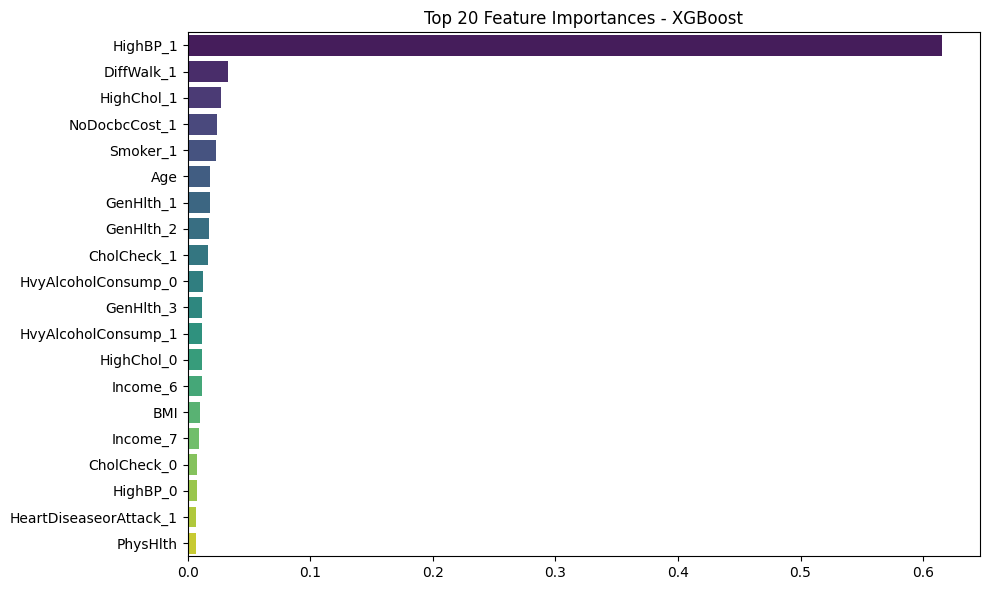

Feature importance plot saved as '04_feature_importance.png'


In [7]:
# ============================================================================
# 5. FEATURE IMPORTANCE
# ============================================================================
print("\n" + "="*80)
print("FEATURE IMPORTANCE")
print("="*80)

best_model = models[best_model_name]
feature_names_original = joblib.load(models_dir / "feature_names.pkl")

if hasattr(best_model, 'feature_importances_'):
    importances = best_model.feature_importances_
    features = feature_names_original
    indices = np.argsort(importances)[::-1]

    plt.figure(figsize=(10,6))
    sns.barplot(x=importances[indices][:20], y=np.array(features)[indices][:20], palette='viridis')
    plt.title(f"Top 20 Feature Importances - {best_model_name}")
    plt.tight_layout()
    plt.savefig("04_feature_importance.png", dpi=300, bbox_inches='tight')
    plt.show()
    print("Feature importance plot saved as '04_feature_importance.png'")
else:
    print(f"Model {best_model_name} does not support feature importances.")